# Mnist Assignment 2

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

## Data Acqisition

### Import Dataset

In [2]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 2s 0us/step


### Checking if data is properly imported

In [5]:
X_train[:5]

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
   

In [6]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [7]:
len(X_train)

60000

Text(0.5, 1.0, '8')

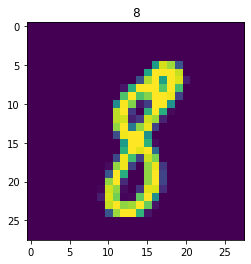

In [8]:
plt.imshow(X_train[300])
plt.title(y_train[300])

## Perform Preprocessing to fit the model

In [10]:
image_size = X_train.shape[1]
input_size = image_size * image_size
input_size

784

In [11]:
X_train.shape

(60000, 28, 28)

In [12]:
X_test.shape

(10000, 28, 28)

### Reshaping the training and test data to fit to the model

In [17]:
np.reshape(X_train, [-1, input_size]).shape

(60000, 784)

In [18]:
X_train = np.reshape(X_train, [-1, input_size])
X_test = np.reshape(X_test, [-1, input_size])

### Scaling the pixel values between 0 and 1

In [20]:
X_train = X_train.astype('float32')/255

In [21]:
X_test = X_test.astype('float32')/255

### Creating variable number labels for unique number labels

In [23]:
num_labels = len(np.unique(y_train))

In [24]:
num_labels

10

### Perform one hot encoding for 0-9 numbers

In [25]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()

In [30]:
y_train_encoded = enc.fit_transform(y_train.reshape(-1, 1))

In [33]:
y_train_encoded.toarray().tolist()[:10]

[[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0],
 [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0],
 [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0]]

In [34]:
y_test_encoded = enc.fit_transform(y_test.reshape(-1, 1))

In [35]:
y_test_encoded.toarray().tolist()[:10]

[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0],
 [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]]

### Convert encoded dataframe to array

In [36]:
y_train_encoded = y_train_encoded.toarray()
y_test_encoded = y_test_encoded.toarray()

### Split dataset into training and testing

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train_encoded)

In [38]:
len(X_train)

45000

In [39]:
len(X_test)

15000

## Build the Deep Learning Model

### Define hyperparameters

In [40]:
batch_size = 128
dropout = 0.45
hidden_units = 256

### Import Deep Learning model requirements

In [41]:
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout

### Build the model

In [42]:
model = Sequential()
# Input Layer
model.add(Dense(hidden_units, input_dim = input_size))
model.add(Activation('relu'))
model.add(Dropout(dropout))
# Second Layer
model.add(Dense(hidden_units))
model.add(Activation('relu'))
model.add(Dropout(dropout))
# Output Layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))

### Compile the model

In [43]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

### Fit the data into the model

In [47]:
model.fit(X_train, y_train, epochs=20, batch_size = batch_size)

Epoch 1/20
352/352 [==============================] - 3s 4ms/step - loss: 0.8279 - accuracy: 0.7379
Epoch 2/20
352/352 [==============================] - 1s 3ms/step - loss: 0.2327 - accuracy: 0.9296
Epoch 3/20
352/352 [==============================] - 1s 3ms/step - loss: 0.1720 - accuracy: 0.9477
Epoch 4/20
352/352 [==============================] - 1s 3ms/step - loss: 0.1454 - accuracy: 0.9553
Epoch 5/20
352/352 [==============================] - 1s 3ms/step - loss: 0.1226 - accuracy: 0.9635
Epoch 6/20
352/352 [==============================] - 1s 3ms/step - loss: 0.1110 - accuracy: 0.9659
Epoch 7/20
352/352 [==============================] - 1s 3ms/step - loss: 0.1018 - accuracy: 0.9683
Epoch 8/20
352/352 [==============================] - 1s 3ms/step - loss: 0.0934 - accuracy: 0.9696
Epoch 9/20
352/352 [==============================] - 1s 3ms/step - loss: 0.0862 - accuracy: 0.9740
Epoch 10/20
352/352 [==============================] - 1s 3ms/step - loss: 0.0757 - accuracy: 0.9765